<a href="https://colab.research.google.com/github/will-hill/Yelp_NLP/blob/master/3.Basic_Keras_DL_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Keras Deep Learning NLP
inspired from 
* https://www.kaggle.com/ngyptr/lstm-sentiment-analysis-keras
* https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-regression-ceee5a9eadff


### Will Setup Code
I created a couple subdirectories in my Google Drive

In [1]:
%who

Interactive namespace is empty.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# 534,7475,638 bytes -->  !ls -l /content/drive/My\ Drive/colab/yelp_nlp/review.json
#    6,685,900 lines -->  !wc -l /content/drive/My\ Drive/colab/yelp_nlp/review.json

/content
-rw------- 1 root root 5347475638 Aug  4 01:21 '/content/drive/My Drive/colab/yelp_nlp/review.json'
6685900 /content/drive/My Drive/colab/yelp_nlp/review.json


In [2]:
%who

drive	 


In [3]:
%%time
REVIEWS_TO_INGEST = 6685900
data_list = list()
columns = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']

# inspired by https://thedatafrog.com/text-mining-pandas-yelp/
with open('/content/drive/My Drive/colab/yelp_nlp/review.json') as reviews:
    import json
    for i, line in enumerate(reviews):

        if i == REVIEWS_TO_INGEST:
            break

            # convert json line to di t
        data = json.loads(line)
        data_list.append([data['review_id'],
                          data['user_id'],
                          data['business_id'],
                          data['stars'],
                          data['useful'],
                          data['funny'],
                          data['cool'],
                          data['text'],
                          data['date']])

reviews.close()
del reviews, i, line, data, REVIEWS_TO_INGEST, json
###
import pandas
df = pandas.DataFrame(data_list, columns=columns)
del data_list, columns, pandas

%who

df	 drive	 
CPU times: user 1min 14s, sys: 6.86 s, total: 1min 21s
Wall time: 1min 24s


In [4]:
display(df.head(3))
df.shape

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03


(6685900, 9)

In [5]:
%time df.to_csv('/content/drive/My Drive/colab/yelp_nlp/reviews.csv', index=False, encoding='UTF-8')

CPU times: user 1min 45s, sys: 3.81 s, total: 1min 49s
Wall time: 2min 8s


In [6]:
%whos

Variable   Type         Data/Info
---------------------------------
df         DataFrame                          rev<...>6685900 rows x 9 columns]
drive      module       <module 'google.colab.dri<...>s/google/colab/drive.py'>


In [0]:
df.to_hdf('/content/drive/My Drive/colab/yelp_nlp/reviews.h5', key='df', mode='w')

### Joanna Setup Code

In [0]:
from google.colab import drive #python code
drive.mount('/content/drive') # python code <- follow the resulting directions
!ln -s drive/My\ Drive data # bash command
!ls # you should "see" drive directory now.
hd5_path='data/reviews.h5'
#!pip install numpy==1.15.4

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
data  drive  sample_data


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Regression: Number of Stars

In [3]:
%%time
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/colab/yelp_nlp/reviews.csv')
del pd

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(6685902, 10)

In [0]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# APPROACH # 1
# inspired by https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456
tokenizer = Tokenizer()
tokenizer.fit_on_text(df['text'].values)
max_length = max([len(

# df = pd.read_hdf(hd5_path)
display(df.head(3))
display(df.describe())
display(df.info())

tokenizer = Tokenizer(num_words=MAX_FEAUTRES, split=' ')
tokenizer.fit_on_texts(df['text'].values)
vocab_size = len(tokenizer.word_index) + 1

X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)

# Normalize Y to be between 0 and 1
Y = df.stars / max(df.stars)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

###

del pd, Tokenizer, pad_sequences, tokenizer, train_test_split, df
%who

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03


,stars,useful,funny,cool
count,6.685900e+06,6.685900e+06,6.685900e+06,6.685900e+06
mean,3.716199e+00,1.354134e+00,4.827667e-01,5.787708e-01
std,1.463643e+00,3.700192e+00,2.378646e+00,2.359024e+00
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
max,5.000000e+00,1.241000e+03,1.290000e+03,5.060000e+02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          float64
useful         int64
funny          int64
cool           int64
text           object
date           object
dtypes: float64(1), int64(3), object(5)
memory usage: 459.1+ MB


None

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 510, 128)          12800     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 510, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 197       
Total params: 267,797
Trainable params: 267,797
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
!nproc
!free -g
!nvidia-smi

2
              total        used        free      shared  buff/cache   available
Mem:             12           1           8           0           2          11
Swap:             0           0           0
Sun Aug  4 01:42:14 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    29W /  70W |    803MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                          

In [16]:
batch_size = 32
epochs = 40
history = model.fit(X_train, Y_train, epochs = epochs, batch_size=batch_size, verbose = 2)

Epoch 1/40
 - 18s - loss: 0.0823 - mean_absolute_error: 0.2391 - acc: 0.4119
Epoch 2/40
 - 19s - loss: 0.0716 - mean_absolute_error: 0.2223 - acc: 0.4119
Epoch 3/40
 - 18s - loss: 0.0661 - mean_absolute_error: 0.2115 - acc: 0.4119
Epoch 4/40
 - 18s - loss: 0.0587 - mean_absolute_error: 0.1973 - acc: 0.4090
Epoch 5/40
 - 18s - loss: 0.0590 - mean_absolute_error: 0.1966 - acc: 0.4090
Epoch 6/40
 - 18s - loss: 0.0556 - mean_absolute_error: 0.1915 - acc: 0.4075
Epoch 7/40
 - 18s - loss: 0.0557 - mean_absolute_error: 0.1912 - acc: 0.4060
Epoch 8/40
 - 18s - loss: 0.0541 - mean_absolute_error: 0.1870 - acc: 0.4090
Epoch 9/40
 - 18s - loss: 0.0505 - mean_absolute_error: 0.1796 - acc: 0.4104
Epoch 10/40
 - 18s - loss: 0.0512 - mean_absolute_error: 0.1783 - acc: 0.4045
Epoch 11/40
 - 18s - loss: 0.0499 - mean_absolute_error: 0.1791 - acc: 0.4090
Epoch 12/40
 - 18s - loss: 0.0501 - mean_absolute_error: 0.1784 - acc: 0.4090
Epoch 13/40
 - 18s - loss: 0.0461 - mean_absolute_error: 0.1725 - acc: 0.

In [0]:
loss, mae, acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

In [0]:
print(loss) #mse
print(mae)
print(acc)

0.07139029947645736
0.21283352095069308
0.3999999963875973


In [0]:
y_pred= model.predict(X_test)

In [0]:
y_pred[0:5]

array([[0.5443308],
       [0.7830462],
       [0.8388883],
       [0.7754902],
       [0.8813996]], dtype=float32)

In [0]:
Y_test[0:5]

521    0.6
737    1.0
740    1.0
660    0.6
411    1.0
Name: stars, dtype: float64

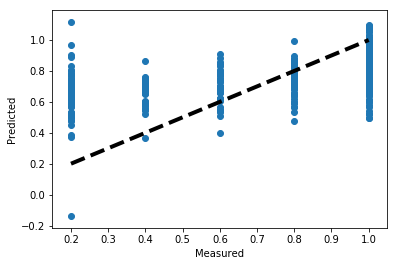

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()